## This is exp 5x26 for ibmq_lima. The initial circuit is 5x6 which is then traspiled to 5x22. Only H and CNOT, CCNOT and X gates are used.

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

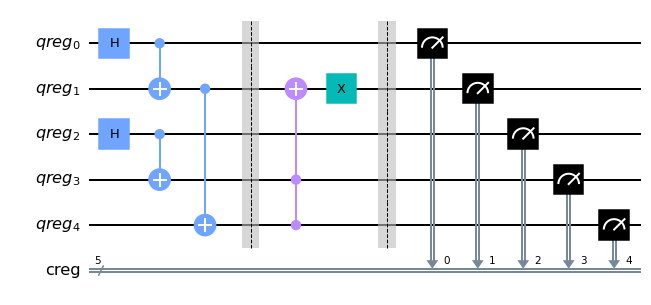

In [2]:
#define the number of qubits - width
width = 5

#define the quantum register
q =  QuantumRegister(width,"qreg")

# define a classical register
# it stores the measurement result of the quantum part
c = ClassicalRegister(width,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(2)

qc.cx(0,1)
qc.cx(1,4)
qc.cx(2,3)
qc.barrier()
qc.ccx(3,4,1)
qc.x(1)
qc.barrier()

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

In [3]:
qc.depth()

6

{'10001': 2501, '11111': 2568, '00010': 2504, '01110': 2427}



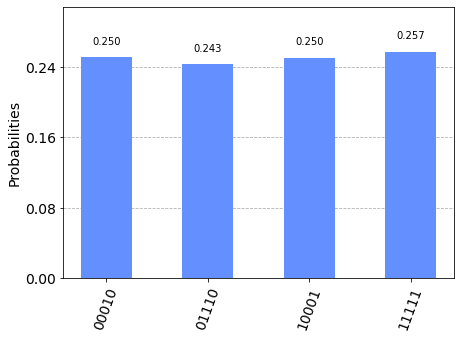

In [3]:
# execute the circuit 10000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [4]:
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

provider = IBMQ.get_provider("ibm-q")
#using this tool to monitor our position in queue
from qiskit.tools.monitor import job_monitor

#choose real device
backend = provider.get_backend('ibmq_lima')

In [5]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

### Run the circuit with optimization_level = 1

In [7]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 30


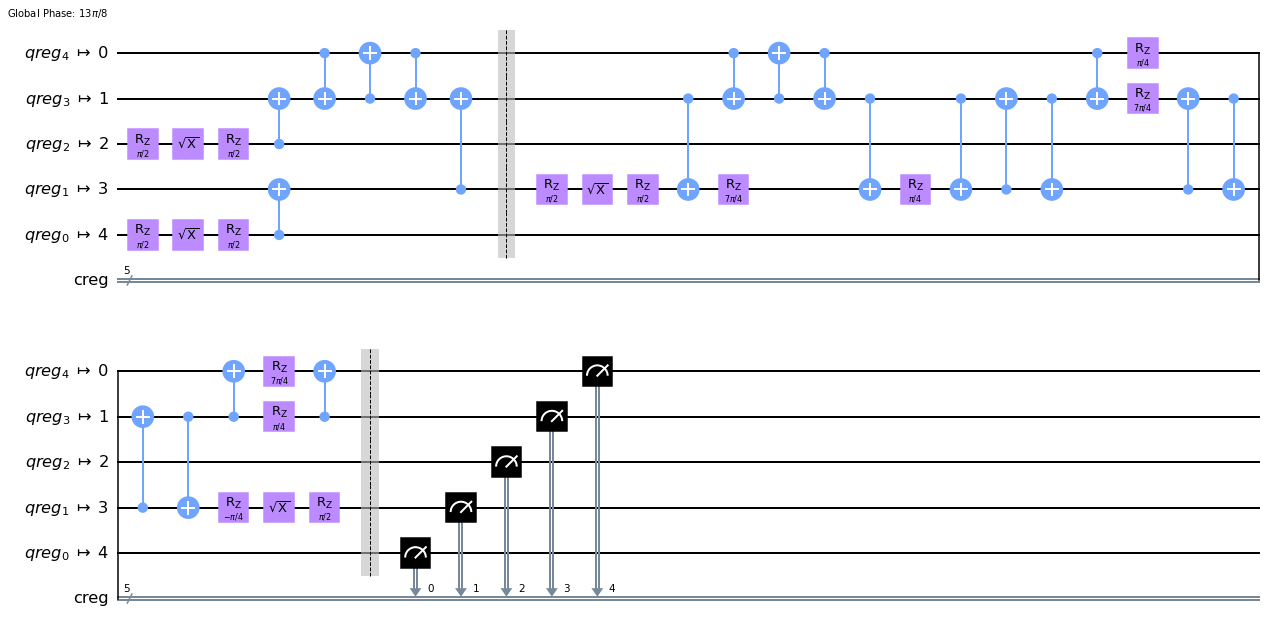

In [8]:
qc_transpiled.draw(output='mpl')

In [9]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job is queued (4)

{'00000': 51, '00001': 38, '10000': 57, '10001': 77, '10010': 52, '10011': 27, '10100': 16, '10101': 26, '10110': 32, '10111': 13, '11000': 20, '11001': 19, '11010': 36, '11011': 32, '11100': 21, '11101': 19, '11110': 42, '11111': 45, '00010': 108, '00011': 13, '00100': 21, '00101': 25, '00110': 39, '00111': 16, '01000': 16, '01001': 11, '01010': 30, '01011': 15, '01100': 22, '01101': 13, '01110': 52, '01111': 20}


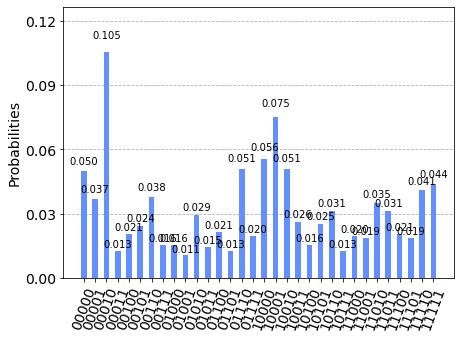

In [ ]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc_transpiled)
print(counts) # print the outcomes


plot_histogram(answer)

as expected the hight depth of the circuit highly affects the outcome and no usefull conclusion can be made on which is the right outcome

### Run the circuit with optimization_level = 2

In [6]:
qc_transpiled = transpile(qc, backend, optimization_level=2)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 22


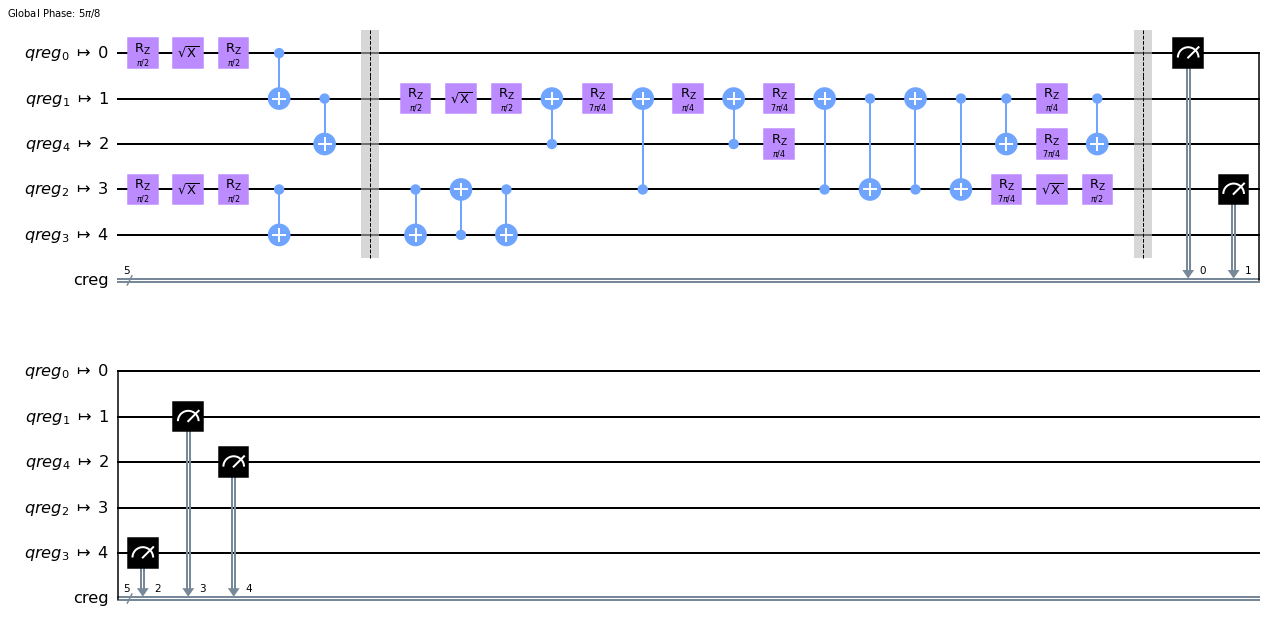

In [7]:
qc_transpiled.draw(output='mpl')

In [8]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 27, '00001': 13, '10000': 105, '10001': 138, '10010': 10, '10011': 26, '10100': 3, '10101': 6, '10110': 11, '10111': 8, '11000': 2, '11001': 4, '11010': 8, '11011': 17, '11100': 13, '11101': 12, '11110': 64, '11111': 124, '00010': 192, '00011': 7, '00100': 11, '00110': 19, '01000': 4, '01001': 2, '01010': 18, '01011': 4, '01100': 13, '01101': 2, '01110': 149, '01111': 12}


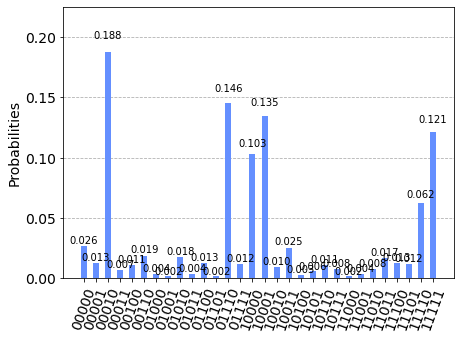

In [9]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc_transpiled)
print(counts) # print the outcomes


plot_histogram(answer)

### Run the circuit with optimization_level = 3

In [10]:
qc_transpiled = transpile(qc, backend, optimization_level=3)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 37


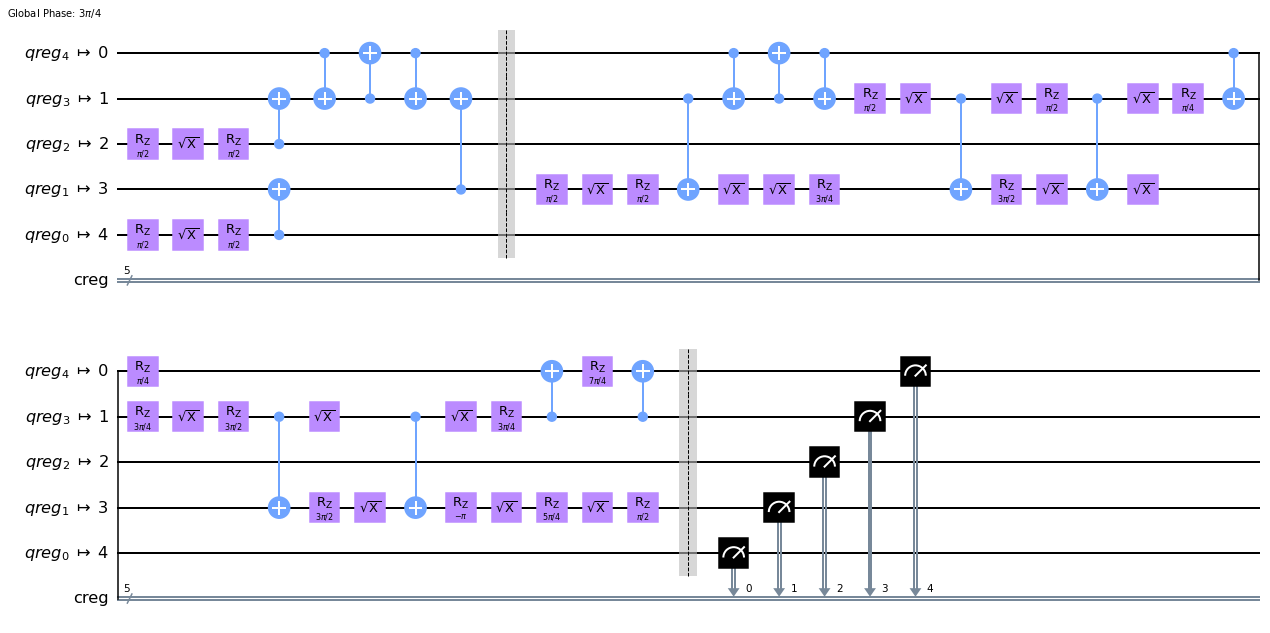

In [11]:
qc_transpiled.draw(output='mpl')

In [12]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 29, '00001': 10, '10000': 91, '10001': 141, '10010': 10, '10011': 12, '10100': 3, '10101': 4, '10110': 5, '10111': 9, '11000': 3, '11001': 3, '11010': 7, '11011': 12, '11100': 12, '11101': 19, '11110': 71, '11111': 105, '00010': 199, '00011': 8, '00100': 8, '00101': 1, '00110': 17, '00111': 1, '01000': 6, '01001': 2, '01010': 30, '01011': 5, '01100': 14, '01101': 6, '01110': 163, '01111': 18}


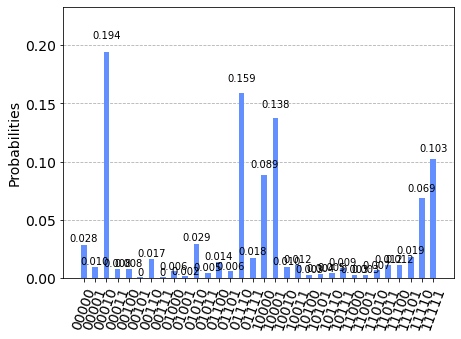

In [13]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc_transpiled)
print(counts) # print the outcomes


plot_histogram(answer)